
# Project: Investigate a Dataset - [TMDb Movie Data]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>


<a id='intro'></a>
## Introduction

### Dataset Description 
 
> The dataset to investigate contains information about **10,866** movies collected from The Movie Database(TMDb). The dataset has **21** columns which are the features of the 10,866 movies. Each column is described below:
    <ol>
    <li><strong>id</strong>: A unique number allocated to the movies the dataset</li>
    <li><strong>imdb_id</strong>: The unique number of the movies in the Internet Movie Database(IMDb) </li>
    <li><strong>popularity</strong>: The movie rating based on user votes</li> 
    <li><strong>budget</strong>: The amount used for the production of a movie</li>
    <li><strong>revenue</strong>: The income generated by a movie</li>
    <li><strong>original_title</strong>: Title of the movie</li>
    <li><strong>cast</strong>: Actors and Actresses in the movie</li>
    <li><strong>homepage</strong>: Website of the movie</li>
    <li><strong>director</strong>: Directors of the movie</li>
    <li><strong>tagline</strong>: A form of dramatic effect for the movie</li>
    <li><strong>keywords</strong>: Words attached to the movie to describe notable action that takes place in the title </li>
    <li><strong>overview</strong>: Description of the movie</li>
    <li><strong>runtime</strong>: Duration of the movie</li>
    <li><strong>genres</strong>: Categories that defines the movie based on it narrative elements</li>
    <li><strong>production_companies</strong>: Company or studio the movie is produced</li>
    <li><strong>release_date</strong>: Date the movie is available for views in theaters</li>
    <li><strong>vote_count</strong>: Total user vote</li>
    <li><strong>vote_average</strong>: Average user vote</li>
    <li><strong>release_year</strong>: Year the movie is available for views in theaters</li>
    <li><strong>budget_adj</strong>: Budget of the movie in terms of 2010 dollars, accounting for inflation over time</li>
    <li><strong>revenue_adj</strong>: Revenue of the movie in terms of 2010 dollars, accounting for inflation over time</li>
    </ol>


### Question(s) for Analysis

> Selecting **revenue** and **popularity** as the dependent variables. Some questions for the analysis are:
> 1. What are the features that determine high **revenue** of a movie?
> 2. What are the features that determine the **popularity** of a movie?
> 3. What is the most popular **genres** of each **year**?
> 4. What are the top 5 year with highest total **revenue**?



In [1]:
# Import All the Packages Needed for Analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Include matplotlib inline to display all visualization in notebook
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling
> In this section, the dataset is loaded into a dataframe for analysis in the notebook with the pd.read_csv() function. Then few lines of the dataset is displayed with .head() function to make sure the data file was correctly read and also to get the idea of what the data looks like.
> I also check for missing values 

In [2]:
# Load the dataset into a dataframe with pandas
tmdb = pd.read_csv('tmdb-movies.csv')

# see few rows of the dataset to make sure the data file was correctly read
tmdb.head(3)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08


In [3]:
# check for null values
tmdb.isna().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64


### Data Cleaning

> The **data cleaning** will begin with checking and fixing the shape of dataset, duplicates, data types of the columns and finally dropping columns that are not needed for analysis.


#### Handling Missing Values

In [4]:
# Fixing the missing values in genres
tmdb.dropna(axis = 0, inplace = True)

Since there are only few missing values in genre, dropping only 23 columns will not affect my analysis based on genres in an way. But there's a large sum of missing values in production_companies and 

In [5]:
# Check for missing values again to ensure the value have been dropped
tmdb.isna().sum()

id                      0
imdb_id                 0
popularity              0
budget                  0
revenue                 0
original_title          0
cast                    0
homepage                0
director                0
tagline                 0
keywords                0
overview                0
runtime                 0
genres                  0
production_companies    0
release_date            0
vote_count              0
vote_average            0
release_year            0
budget_adj              0
revenue_adj             0
dtype: int64

In [6]:
# check for duplicates in the dataset
sum(tmdb.duplicated())

0

In [7]:
# Check the datatypes of the columns
tmdb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1992 entries, 0 to 10819
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    1992 non-null   int64  
 1   imdb_id               1992 non-null   object 
 2   popularity            1992 non-null   float64
 3   budget                1992 non-null   int64  
 4   revenue               1992 non-null   int64  
 5   original_title        1992 non-null   object 
 6   cast                  1992 non-null   object 
 7   homepage              1992 non-null   object 
 8   director              1992 non-null   object 
 9   tagline               1992 non-null   object 
 10  keywords              1992 non-null   object 
 11  overview              1992 non-null   object 
 12  runtime               1992 non-null   int64  
 13  genres                1992 non-null   object 
 14  production_companies  1992 non-null   object 
 15  release_date        

In [8]:
# Drop columns that are not useful
tmdb.drop(['imdb_id', 'cast', 'homepage', 'tagline', 'keywords', 'overview', 'release_date'], axis = 1, inplace = True)

In [9]:
# Check the shape of the dataset again to ensure the columns were properly dropped
tmdb.shape

(1992, 14)

- The dataset has a shape of (10866, 21)
- 1 duplicate is present, not necessary to drop the row
- All columns have a correct data type and there's no need for further conversions **except** for the datetime columns: **release_date**. 
- **imdb_id, overview, tagline, cast, homepage,keywords** columns will all be dropped because they are not needed for the analysis. **release_date** will also be dropped because the year is present in the dataset and that will be enough for analysis based on timeline
- Checking for the shape of the dataset again shows that the number of columns have reduced to 14 

In [10]:
# Display the description of the dataset
tmdb.describe()      # we can easily see some statistical inference using df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,1992.000000,1992.000000,1.992000e+03,1.992000e+03,1992.000000,1992.000000,1992.000000,1992.000000,1.992000e+03,1.992000e+03
mean,71652.152108,1.316763,3.454924e+07,1.152153e+08,106.040161,643.616968,6.178614,2007.796687,3.627376e+07,1.302391e+08
std,92355.883915,1.873563,5.061878e+07,2.202887e+08,29.234592,1092.355998,0.881955,7.549224,5.129783e+07,2.564338e+08
min,11.000000,0.000620,0.000000e+00,0.000000e+00,0.000000,10.000000,2.100000,1961.000000,0.000000e+00,0.000000e+00
25%,9699.000000,0.384079,0.000000e+00,0.000000e+00,92.000000,51.000000,5.600000,2006.000000,0.000000e+00,0.000000e+00
50%,35112.500000,0.774223,1.500000e+07,2.578782e+07,102.000000,210.000000,6.200000,2010.000000,1.524601e+07,2.806370e+07
75%,83573.000000,1.538639,4.800000e+07,1.278787e+08,116.000000,688.250000,6.800000,2012.000000,5.064450e+07,1.393645e+08
max,414419.000000,32.985763,4.250000e+08,2.781506e+09,705.000000,9767.000000,8.300000,2015.000000,4.250000e+08,2.827124e+09


### Data Cleaning (Cont.)

1. To aid my analysis, an additional column is created from dividing or 'cutting' the budget column into categories: **high_budget** and **low_budget** with the pd.cut() function, high budget movies are movies that have production budget to be above the average movie production budget.


In [11]:
# use the minimum, mean and maximum budget to create bin edges for transformation of runtime column
min_budget = tmdb.budget.min()
avg_budget = tmdb.budget.mean()
max_budget = tmdb.budget.max()

In [12]:
# bins that will divide the data into groups
bins = [min_budget, avg_budget, max_budget]
names = ['low_budget', 'high_budget']

In [13]:
# Create film_budget column that holds the categorical data of budgets
tmdb['film_budget'] = pd.cut(tmdb['budget'], bins, labels = names, include_lowest=True)

# check to ensure that the column was created
tmdb['film_budget'].head(2)

0    high_budget
1    high_budget
Name: film_budget, dtype: category
Categories (2, object): ['low_budget' < 'high_budget']

2. Another column that needs to be ransformed is the runtime. **short**, **mid_length**, **mod_long** and **very_long** will be created using pd.cut() function on the runtime data series.

In [14]:
# use the runtime.describe() to find the values of bin edges
tmdb['runtime'].describe()

count    1992.000000
mean      106.040161
std        29.234592
min         0.000000
25%        92.000000
50%       102.000000
75%       116.000000
max       705.000000
Name: runtime, dtype: float64

In [15]:
# fill the bin edges with values from min, 25%, 50%, 75% and max respectively
bins = [0.0, 90.0, 99.0, 111.0, 900.0]
names = ['short', 'mid_length', 'mod_long', 'very_long']

In [16]:
# Create movie_length column that holds the categorical data of runtime
tmdb['movie_length'] = pd.cut(tmdb['runtime'], bins, labels = names, include_lowest=True)

# check to ensure that the column was created
tmdb['movie_length'].head(2)

0    very_long
1    very_long
Name: movie_length, dtype: category
Categories (4, object): ['short' < 'mid_length' < 'mod_long' < 'very_long']

3. The last column that needs to be ransformed is the revenue. **low_revenue** and **high_revenue** will be created using pd.cut() function on the revenue data series.

In [17]:
# use the minimum, mean and maximum budget to create bin edges
min_revenue = tmdb.revenue.min()
avg_revenue = tmdb.revenue.mean()
max_revenue = tmdb.revenue.max()

In [18]:
# bins that will divide the data into groups
bins = [min_revenue, avg_revenue, max_revenue]
names = ['low_revenue', 'high_revenue']

In [19]:
# Create film_revenue column that holds the categorical data of revenues
tmdb['film_revenue'] = pd.cut(tmdb['revenue'], bins, labels = names, include_lowest = True)

# check to ensure that the column was created
tmdb['film_revenue'].head(2)

0    high_revenue
1    high_revenue
Name: film_revenue, dtype: category
Categories (2, object): ['low_revenue' < 'high_revenue']

<a id='eda'></a>
## Exploratory Data Analysis 
> Now that the dataset has been wrangled and cleaned, let's begin the analysis of the dataset by first checking the visual summaries of the dataset using .hist() function and then finally exploring the questions posed at the <a href="#intro">Introduction</a>.


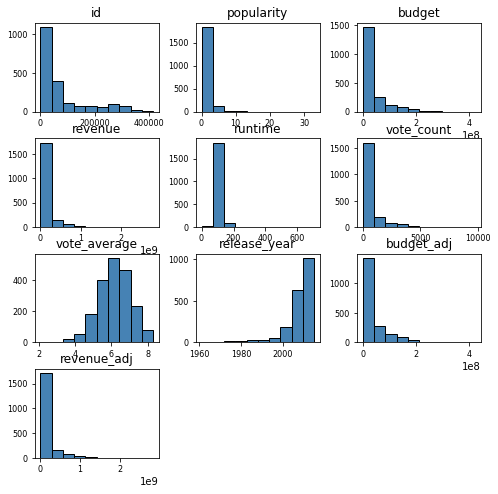

In [20]:
# Display the histogram of all numerical data in the dataset
tmdb.hist(color='steelblue', edgecolor='black', linewidth=1.0, xlabelsize=8, ylabelsize=8, figsize = (8,8), grid=False);

In [21]:
# Create a generic function that plots all bar chat in tha analysis
def plot_bar(data, x, y, title):
    '''
    Create a function for the bar charts to be plotted
    
    Parameters
    -----------
    data: analysis code
    x: x-axis label
    y: y-axis label
    title: title of the chart
    
    Returns
    --------
    A bar chart that visualizes the analysis done when the function is called 
    with the appropriate parameters
    '''
    data.plot(kind = 'bar', color = ['red','steelblue', 'green', 'cyan', 'magenta'], edgecolor='black', linewidth=1.0, alpha=.7)
    plt.xlabel(x, fontsize = 18)
    plt.ylabel(y, fontsize = 18)
    plt.title(title, fontsize = 18)

In [22]:
# Create a function to plot line graph
def plot_line(data, x_label, y_label, title):
    '''
    Create a function for the line charts to be plotted
    
    Parameters
    -----------
    data: analysis code
    x: x-axis label
    y: y-axis label
    title: title of the chart
    
    Returns
    --------
    A line chart that visualizes the analysis done when the function is called 
    with the appropriate parameters
    '''
    data.plot(color = 'green')
    plt.xlabel(x_label, fontsize = 18)
    plt.ylabel(y_label, fontsize = 18)
    plt.title(title, fontsize = 18)
    plt.legend()
    

### Q1. What are the features that determine high **revenue** of a movie?

The variables that are used to answer the question above are:
> - **budget**
> - **runtime**
> -**vote_count**
> -**vote_average**
> -**popularity**


#### Plot Average Revenue Trends Over Time

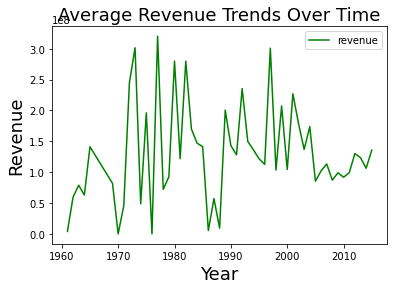

In [23]:
plot_line(tmdb.groupby('release_year')['revenue'].mean(), 'Year', 'Revenue', 'Average Revenue Trends Over Time')

##### This shows that there's drop in the average revenue of movies in mid 1970s and the in late 1980's. The late 1990s to early 2000s has higher average revenue and then there's drop in the average revenue towards mid 2000s to 2010.

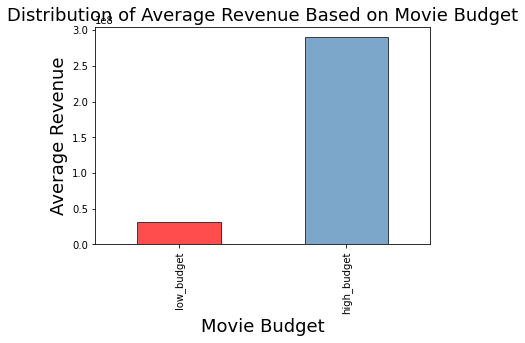

In [24]:
# call function to analyze the impact of movie budget on movie revenue
plot_bar(tmdb.groupby('film_budget')['revenue'].mean(), 'Movie Budget', 'Average Revenue', 'Distribution of Average Revenue Based on Movie Budget')

### Impact of Movie Budget(budget) on Movie Revenue(revenue)
> The chart below shows production budget of a movies is an important feature that determines the revenue of the movie. Note how the average revenue of a high budget movie is much more than the average revenue of a low budget movie.

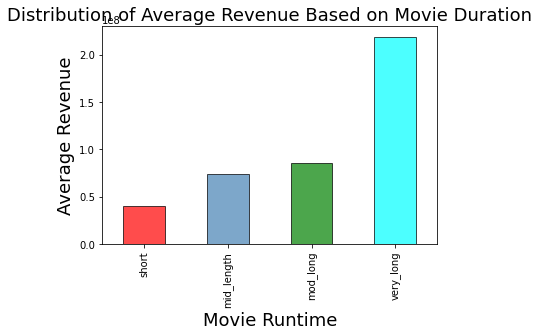

In [25]:
# call function to analyze the impact of movie runtime on average movie revenue
plot_bar(tmdb.groupby('movie_length')['revenue'].mean(), 'Movie Runtime', 'Average Revenue', 'Distribution of Average Revenue Based on Movie Duration')

### Impact of Movie Duration(runtime) on Movie Revenue(revenue)
> The bar graph below indicates that the runtime of a movies is a variable that determines the income of the movie. Notice the gradual increment on the average revenue with the increment of the movie runtime. Conclusion is that, very long movies generate significantly more revenue that shorter movies.

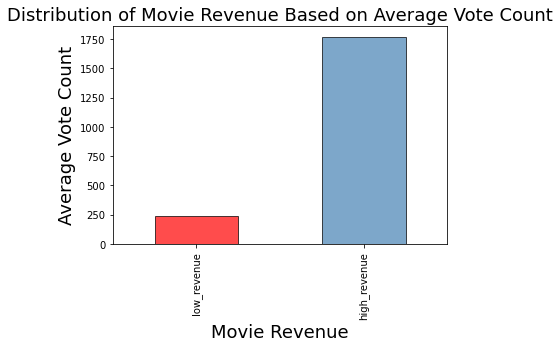

In [26]:
# call function to analyze impact of average vote_count on movie revenue
plot_bar(tmdb.groupby('film_revenue')['vote_count'].mean(), 'Movie Revenue', 'Average Vote Count', 'Distribution of Movie Revenue Based on Average Vote Count')

### Impact of Vote Count(vote_count) on Movie Revenue(revenue)
> Analysis shows that user vote count of a movie also determines the revenue of the movie. The chart reveals that movies that generate low revenue have low average vote count. Therefore, audience vote count is a factor that determines the success of a movie.

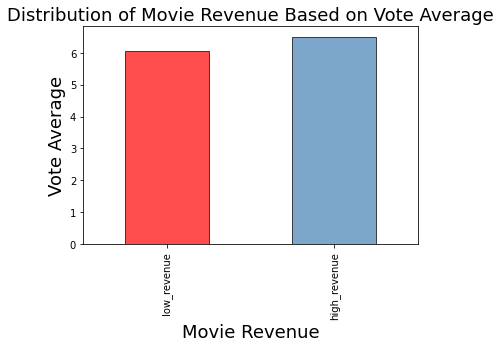

In [27]:
# call function to analyze impact of vote_average on movie revenue
plot_bar(tmdb.groupby('film_revenue')['vote_average'].mean(), 'Movie Revenue', 'Vote Average', 'Distribution of Movie Revenue Based on Vote Average')

### Impact of Vote Average(vote_average) on Movie Revenue(revenue)
> There is not much impact of vote_average on revenue. This means that a movie can be successful without the impact of the vote average.

##### Let's analyze the relationship between vote_count and popularity with scatter plot. Although, the chart show a positive correlation between the two variables, there is not a clear indicator that vote_count and popularity are similar

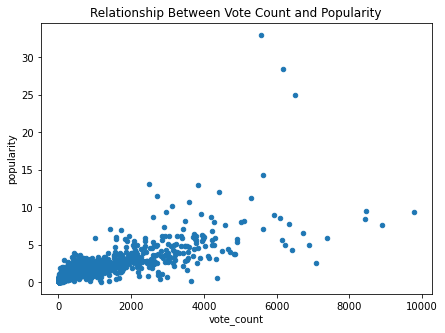

In [28]:
# sactter plot to check the relationship between popularity and vote_count
tmdb.plot.scatter(x = 'vote_count', y = 'popularity', marker = 'o', figsize = (7,5), title = 'Relationship Between Vote Count and Popularity');

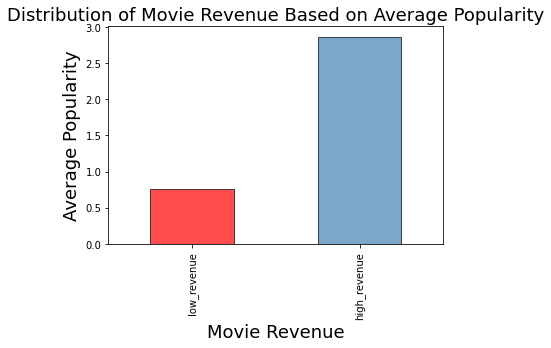

In [29]:
# call function to analyze impact of average popularity on movie revenue
plot_bar(tmdb.groupby('film_revenue')['popularity'].mean(), 'Movie Revenue', 'Average Popularity', 'Distribution of Movie Revenue Based on Average Popularity')

### Impact of Popularity on Movie Revenue(revenue)
> Popularity of a movie is another feature that determines the revenue of the movie. Higher popularity of a movie allows allows the movie to generate more revenue.

### Q2. What are the features that determine the **popularity** of a movie?

The variables that are used to answer the question above are:
> - **budget**
> - **runtime**

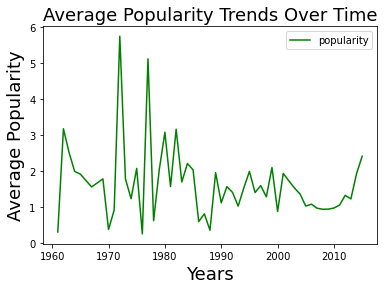

In [30]:
# Display Average Popularity Trend Over Time
plot_line(tmdb.groupby('release_year')['popularity'].mean(), 'Years', 'Average Popularity', 'Average Popularity Trends Over Time')

##### With the graph above, we can see that the most popular movies were released in 1970s to 1980s.

In [31]:
# Recall the new column created for categorical budget, 
# use groupby to find the average popularity of movies with different budget
data = tmdb.groupby('film_budget')['popularity'].mean()

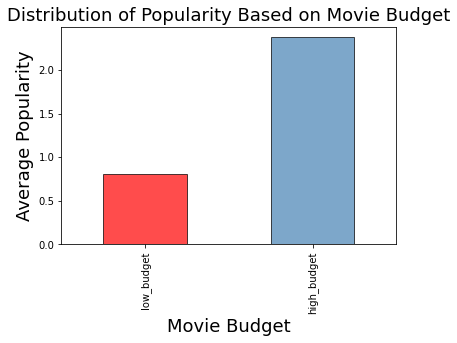

In [32]:
# call the plot_bar function to analyze the impact of budget on popularity
plot_bar(data, 'Movie Budget', 'Average Popularity', 'Distribution of Popularity Based on Movie Budget')

### Impact of Movie Budget on Popularity(Ratings)
> The chart shows that if a production company spend money on good resources or perharps good cast, the high cost of the movie budget will result in increase in popularity of the movie which directly translates to increase in the movie revenue 

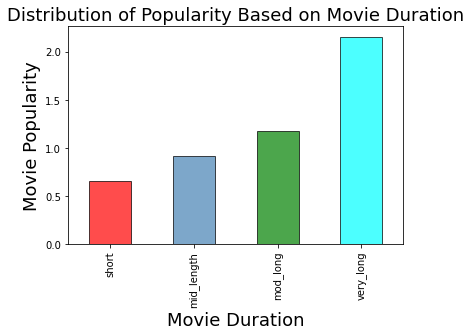

In [33]:
# call the plot_bar function to analyze the impact of budget on popularity
plot_bar(tmdb.groupby('movie_length')['popularity'].mean(), 'Movie Duration', 'Movie Popularity', 'Distribution of Popularity Based on Movie Duration')

### Impact of Movie Runtime on Popularity(Ratings)
> Notice how the popularity of movies are based off the length or duration of movies. Lengthy movies must have costed more than shorter movies, since movie budget also influence the popularity of the movies.

### Q3. What is the most popular **genres** of each **year**?

In [34]:
# Let's analyze the most popular genres of all time
data = tmdb.groupby('genres')['genres'].value_counts().sort_values(ascending = False)[:20]

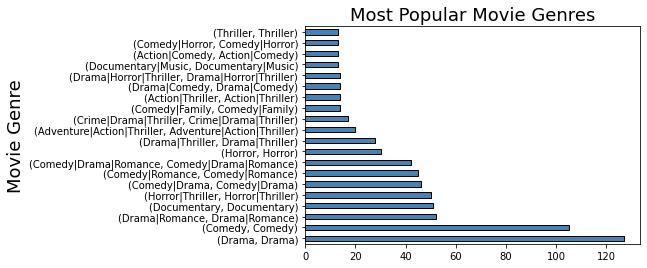

In [36]:
# Visuals of the most popular genres of all time
data.plot(kind = 'barh', color='steelblue', edgecolor='black')
plt.ylabel('Movie Genre', fontsize = 18)
plt.title('Most Popular Movie Genres', fontsize = 18);

##### The chart below shows that Comedy is the most popular genre of all time with Drama as a close second

In [37]:
# count of most genres by release_year in the dataset and select to print the top genres each year
tmdb.groupby('release_year')['genres'].apply(lambda x: x.value_counts().head(1)).reset_index()

,release_year,level_1,genres
0,1961,Comedy|Family,1
1,1962,Adventure|Action|Thriller,1
2,1963,Action|Thriller|Adventure,1
3,1964,Adventure|Action|Thriller,1
4,1965,Adventure|Action|Thriller,1
5,1967,Action|Thriller|Adventure,1
6,1969,Adventure|Action|Thriller,1
7,1970,Comedy|Drama|Thriller,1
8,1971,Adventure|Action|Thriller|Science Fiction,1
9,1972,Drama|Crime,1


### Q4. What are the top 5 year with highest total **revenue**?

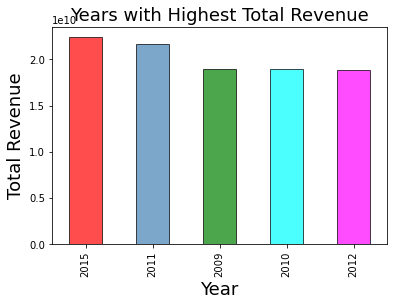

In [38]:
# Analyze most succesful year in movie industry
plot_bar(tmdb.groupby('release_year')['revenue'].sum().sort_values(ascending = False)[:5], 'Year', 'Total Revenue', 'Years with Highest Total Revenue')

##### This analysis shows that 2015 is the most successful year in movie industry with 267.6 Trillion in total revenue

### Q5. Top 20 directors that directed movies with high revenue


In [39]:
# Top 20 directors that directed movies with high revenue
tp_dir = tmdb.loc[tmdb['film_revenue'] == 'high_revenue', ['director', 'runtime', 'revenue']].sort_values(by = 'revenue', ascending = False)[:20]
tp_dir

,director,runtime,revenue
1386,James Cameron,162,2781505847
3,J.J. Abrams,136,2068178225
5231,James Cameron,194,1845034188
4361,Joss Whedon,143,1519557910
0,Colin Trevorrow,124,1513528810
4,James Wan,137,1506249360
14,Joss Whedon,141,1405035767
3374,David Yates,130,1327817822
5422,Chris Buck|Jennifer Lee,102,1274219009
5425,Shane Black,130,1215439994


In [40]:
# What are the most popular runtime based off the work of the top directors
tp_dir.groupby('runtime')['director'].value_counts()

runtime  director                
91       Kyle Balda|Pierre Coffin    1
102      Chris Buck|Jennifer Lee     1
103      Lee Unkrich                 1
108      Tim Burton                  1
124      Colin Trevorrow             1
130      David Yates                 1
         Shane Black                 1
136      J.J. Abrams                 1
         Rob Marshall                1
137      James Wan                   1
141      Joss Whedon                 1
143      Joss Whedon                 1
         Sam Mendes                  1
151      Gore Verbinski              1
154      Michael Bay                 1
162      James Cameron               1
165      Christopher Nolan           1
169      Peter Jackson               1
194      James Cameron               1
201      Peter Jackson               1
Name: director, dtype: int64

##### The range of runtime that generated the highest revenue is between 90 and 202 minutes

<a id='conclusions'></a>
## Conclusions

> Movie industries are businesses with the goal of producing movies that are very successful, meaning, producing movies that generates very high revenue so that they can make significant profit on the movie. Throughout the analysis, many features have been analysed to see which ones determine the success of a movie. The methods future movie producers can follow to ensure the success of their movies are:
> - Making a large investment on the film production, that is, having a high budget for a movie.
> - Proper marketing of the movie to increase movie popularity thereby increasing revenue by the number of sales. 
> - vote_count of a movie increases the revenue of the movie significantly.

>**Results**

 >In the first question, I analysed the factors that have impact on the revenue of the movie. The variables I used in these analysis are budget, popularity, runtime, vote_count and vote_average. I could not find any correlation between high grossing movies and vote_average. All other variables have significant impact on high revenue of movies.



## Limitations

>There is a significant sum of missing values in the production_companies column and due to the inability to fill the string column with the mean of the column, These missing values distorted the analysis.

> Analysis done without dropping the rows with null values were completely differnt from the ones done with no null values present in terms of anlayzing the trends in revenue over time and the trends in movie popularity over time.

> There's no clear relationship between vote_count and vote_average. There is also no clear meaning behind the **vote_avarage** and also popularity, how was popularity calculated?, is popularity of a movie similar to vote_average?.